In [1]:
from plistlib import dumps

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import pipe_lines
from mlflow import catboost
from mlflow.metrics import f1_score
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy.sql.util import criterion_as_pairs
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import phik
import joblib

In [2]:
df = pd.read_csv('data/telco_customer_churm.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())


11


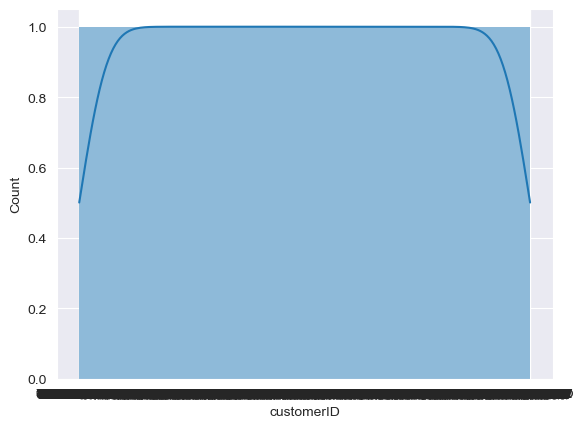

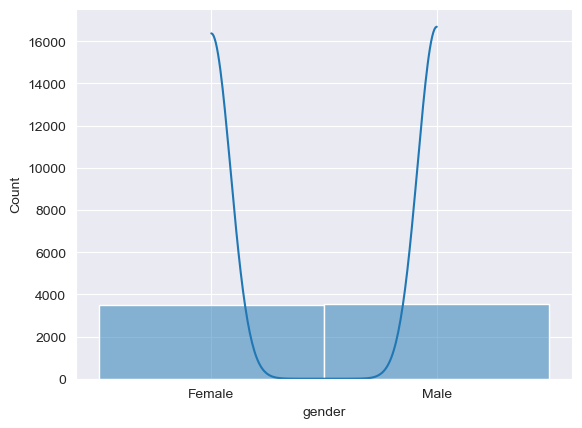

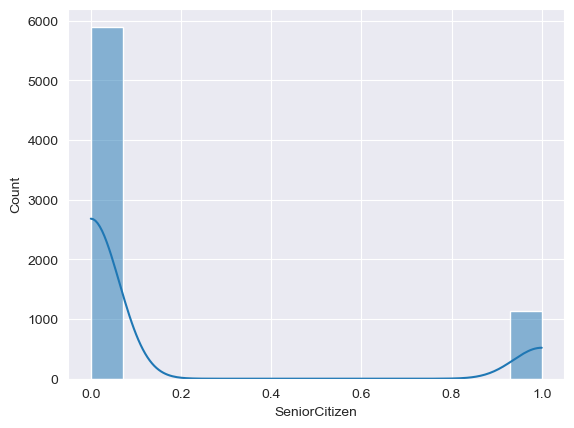

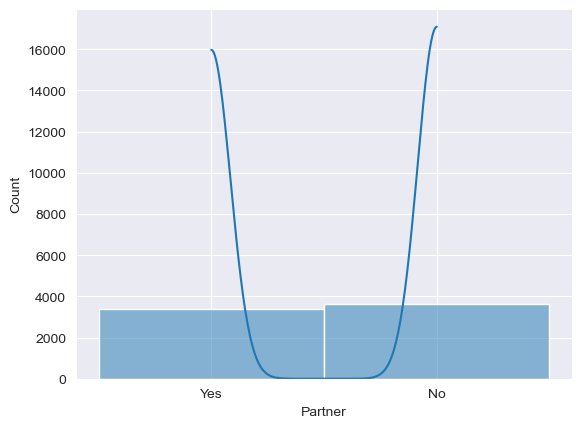

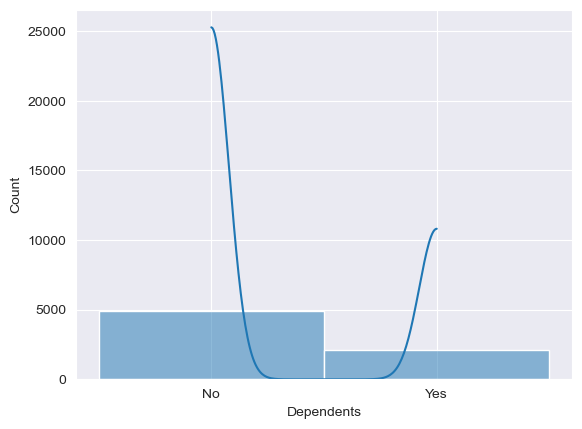

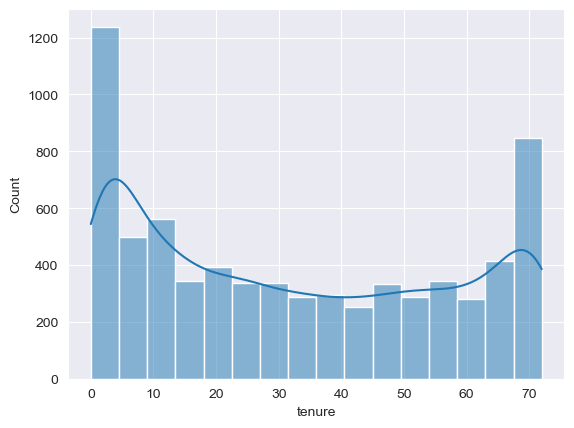

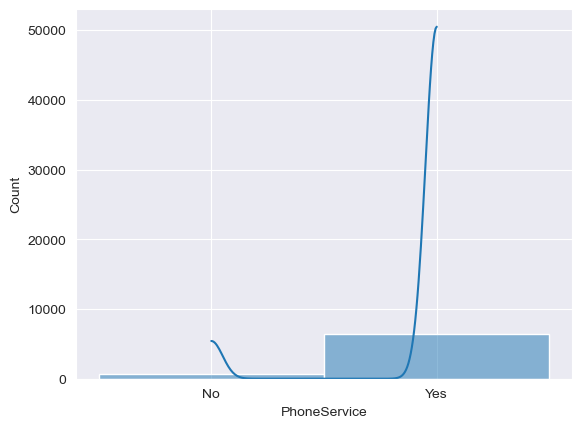

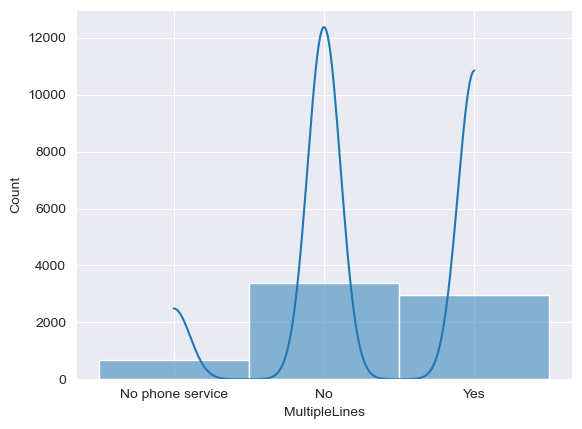

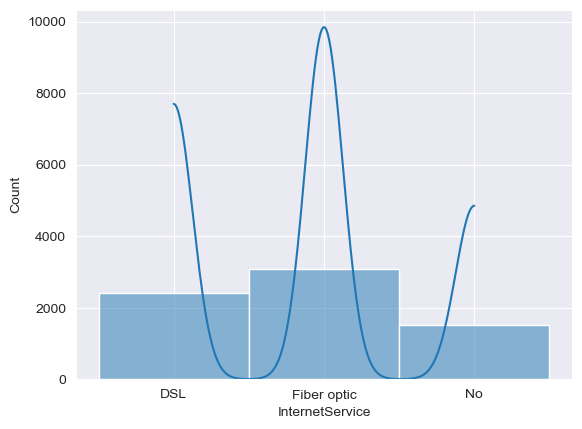

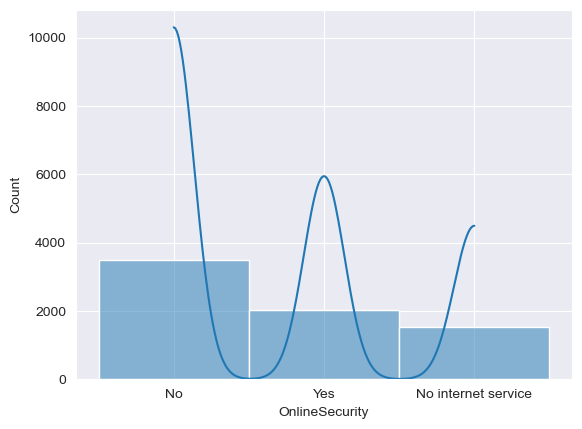

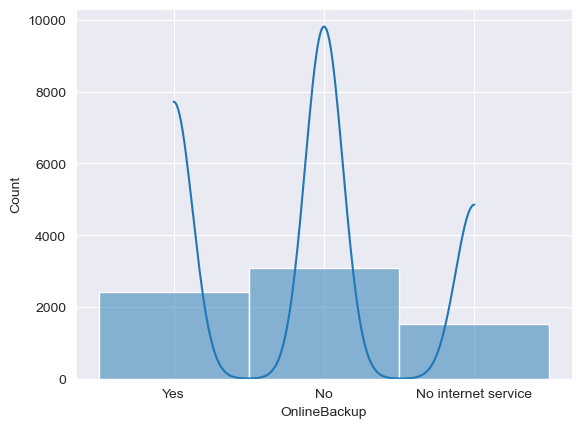

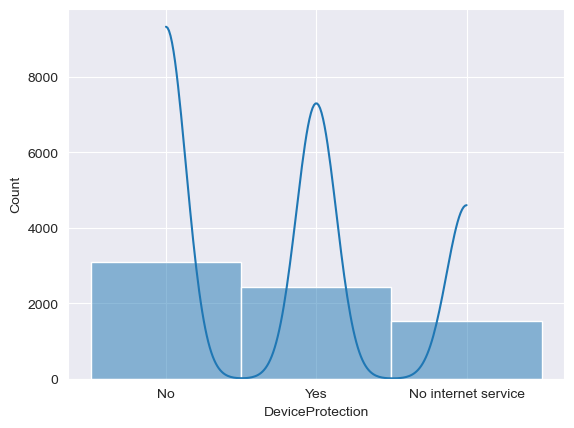

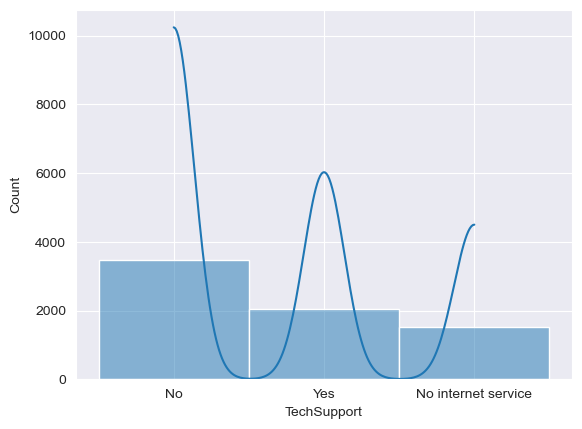

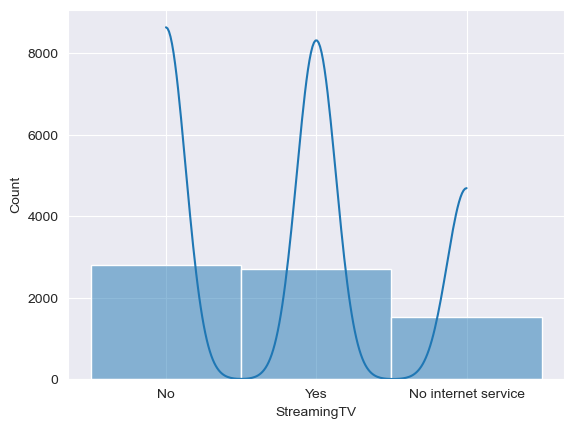

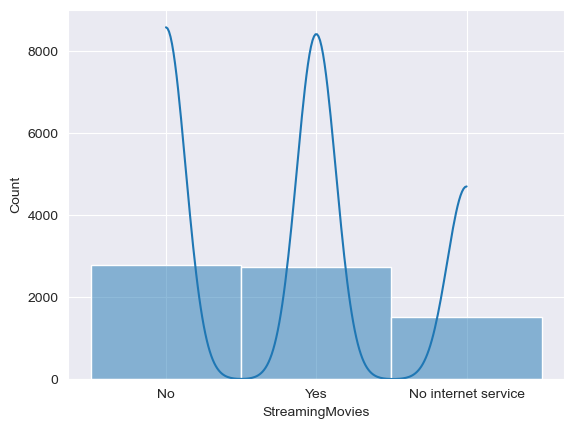

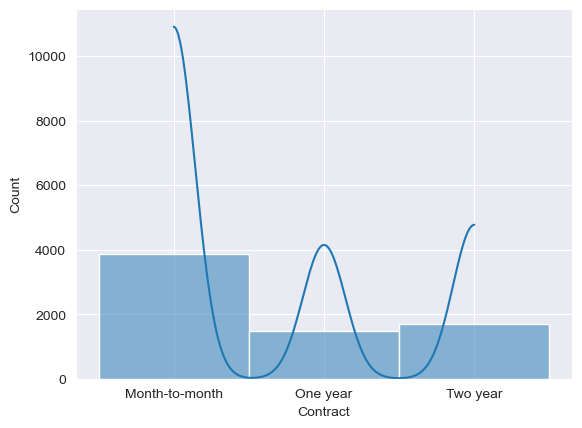

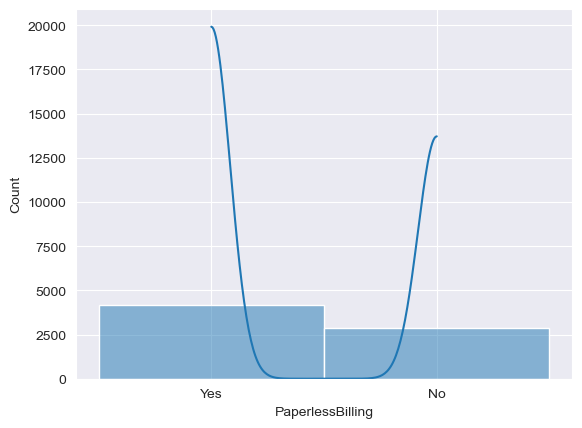

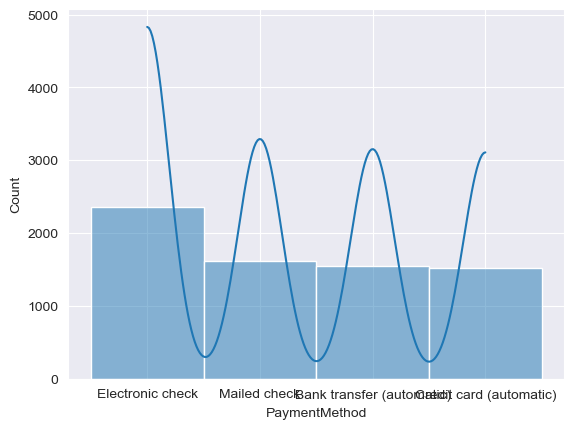

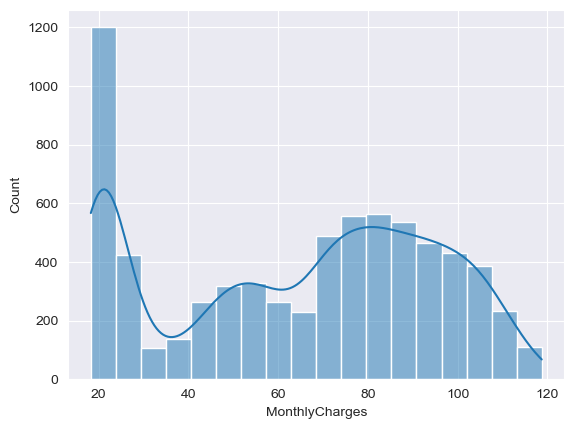

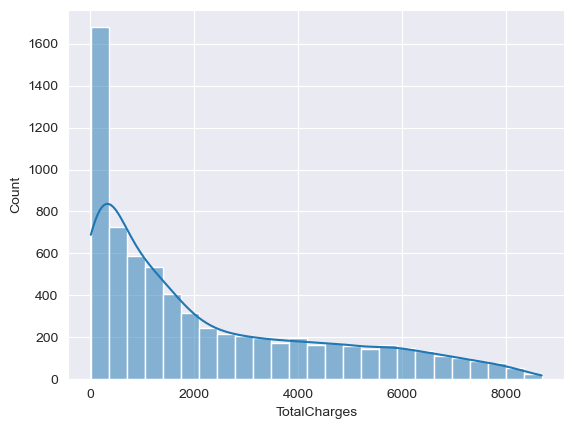

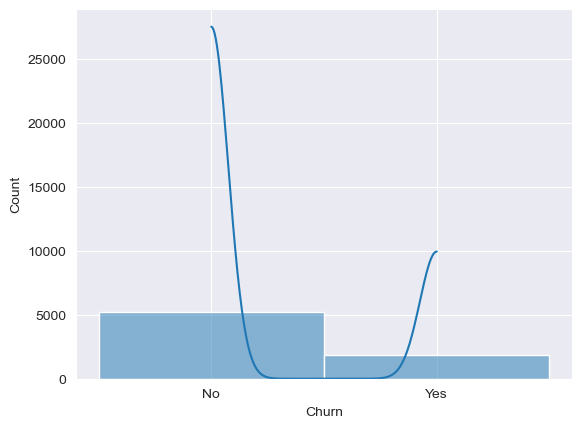

In [9]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=True)
    plt.show()

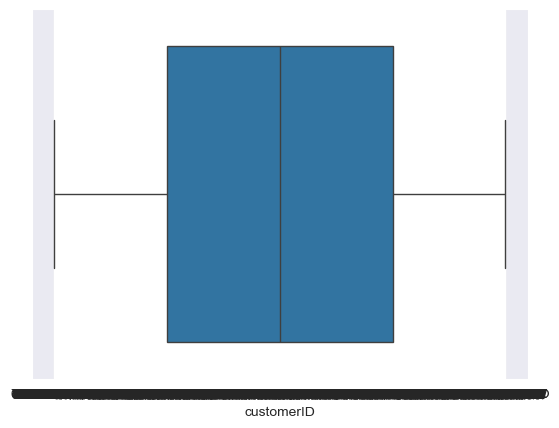

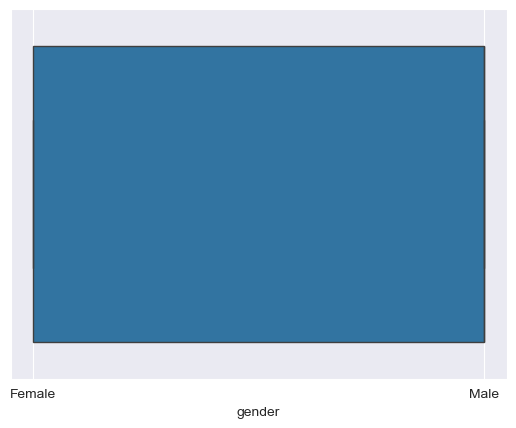

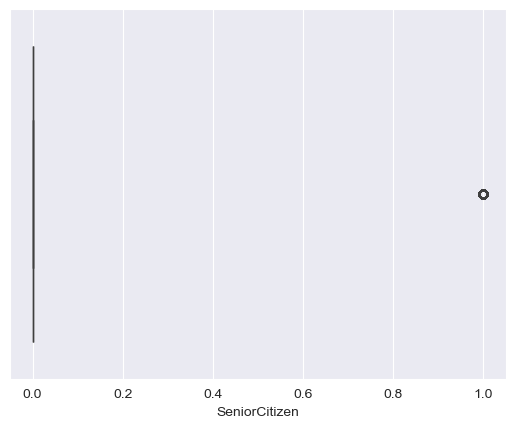

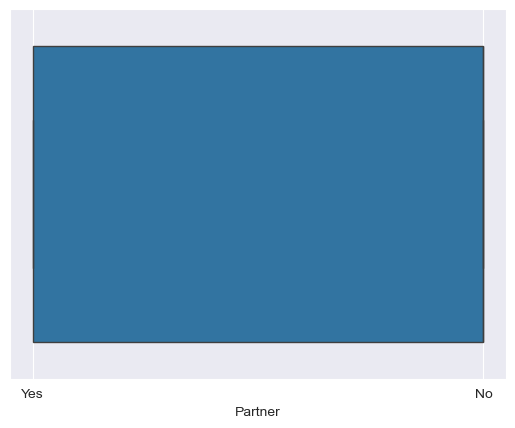

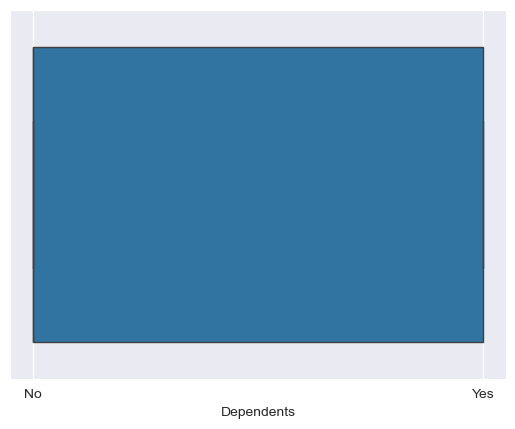

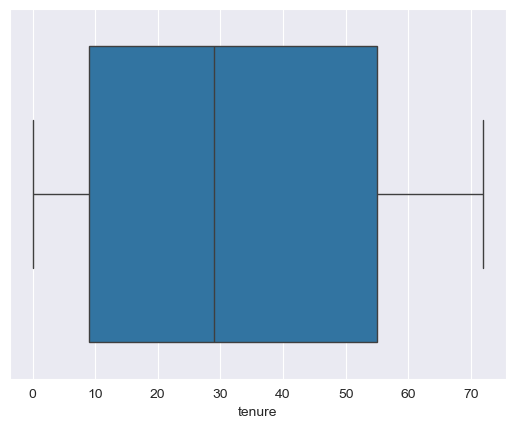

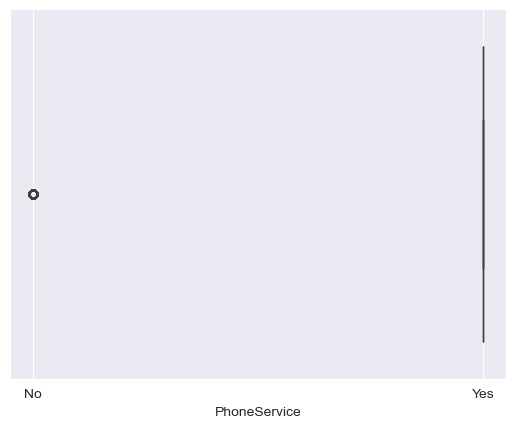

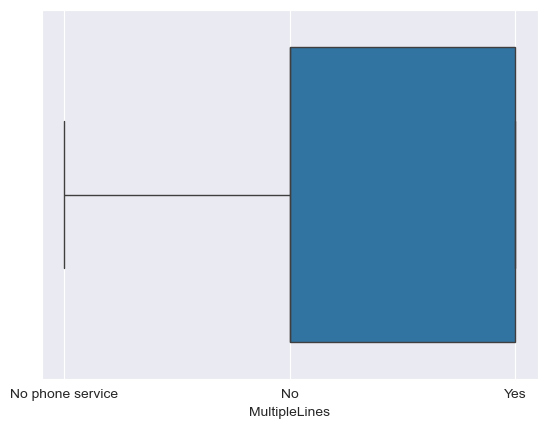

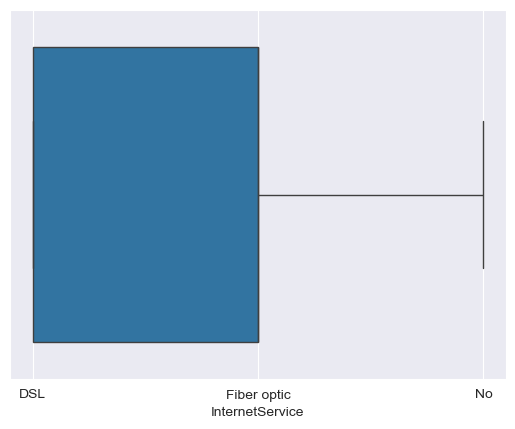

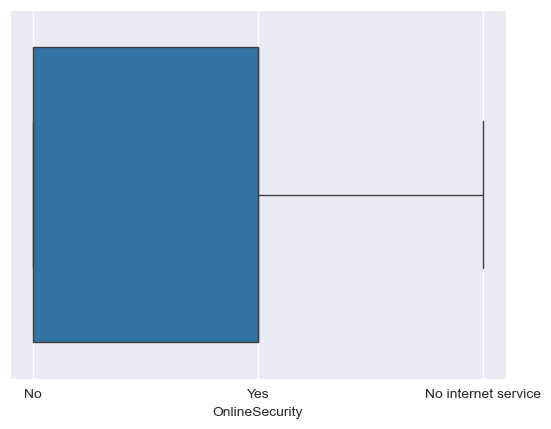

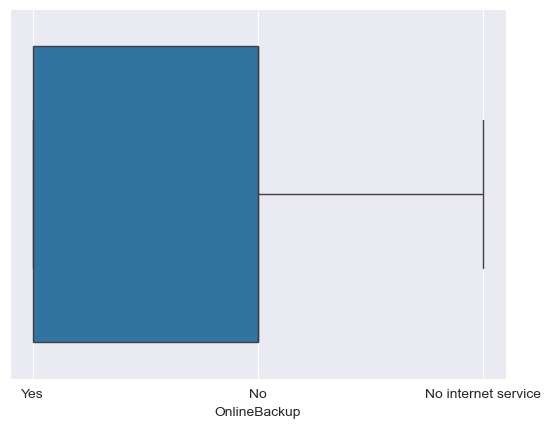

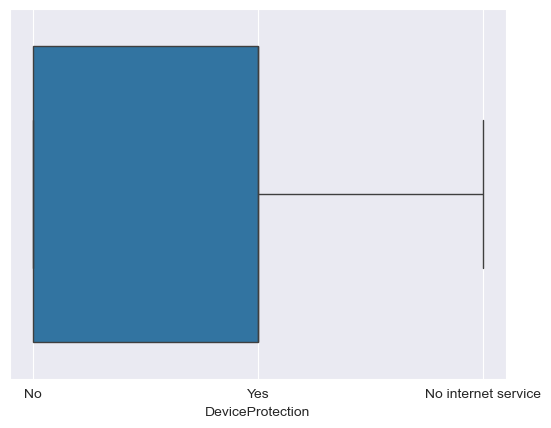

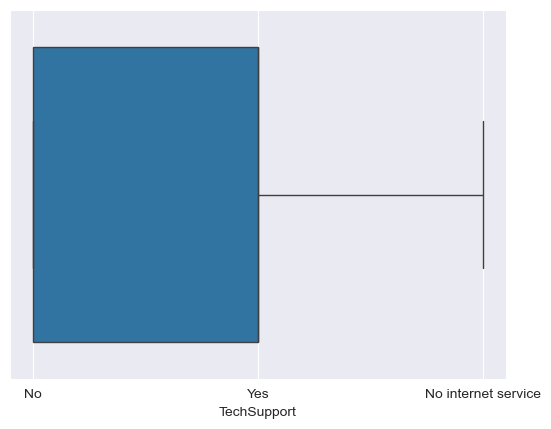

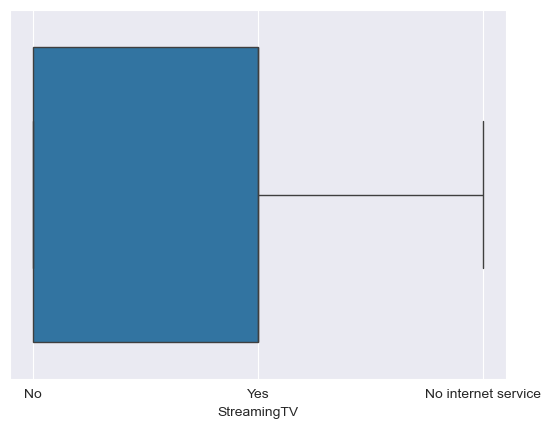

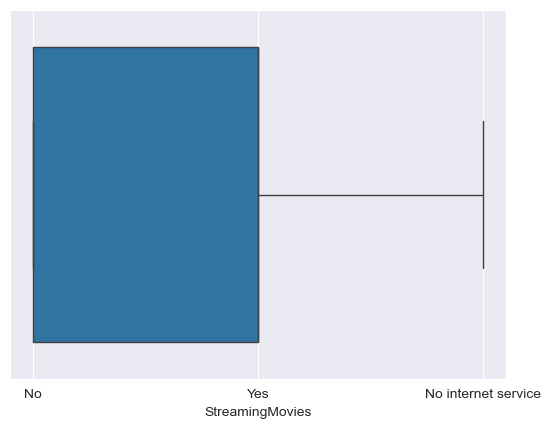

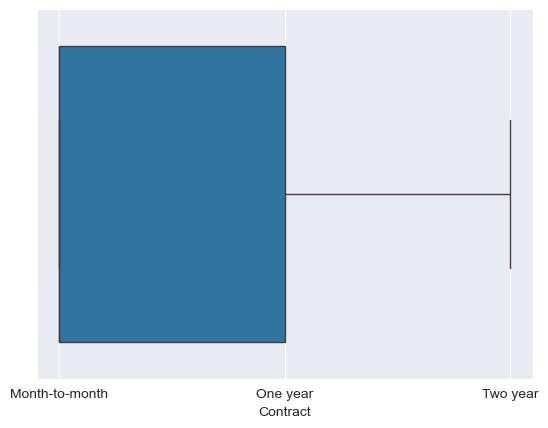

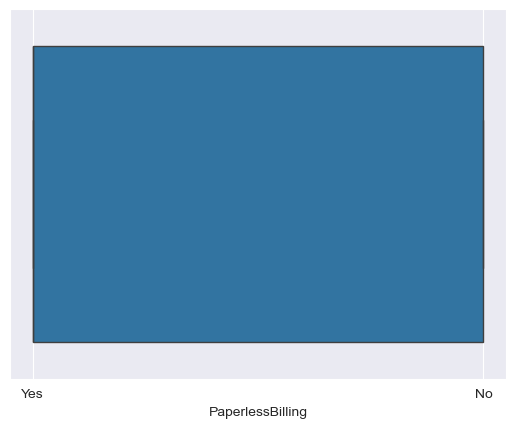

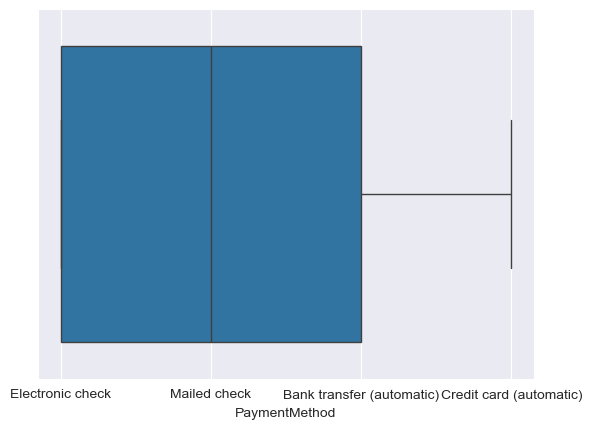

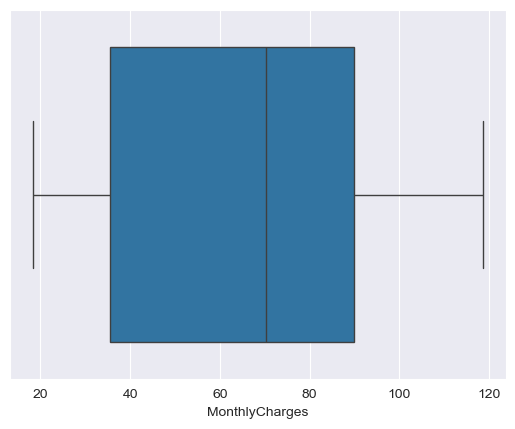

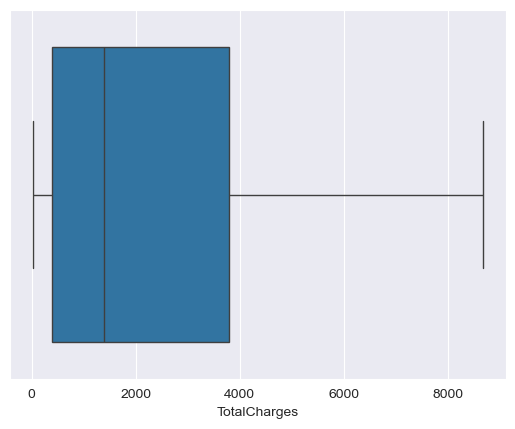

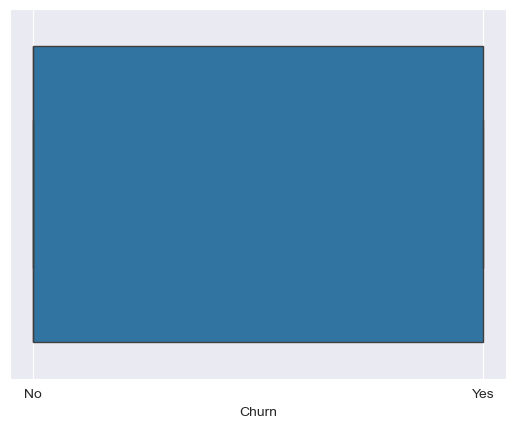

In [10]:
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

In [15]:
phik_corr = numeric_df.phik_matrix()
print(phik_corr)

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.028663        0.304691      0.148024
tenure               0.028663  1.000000        0.411002      0.842085
MonthlyCharges       0.304691  0.411002        1.000000      0.762975
TotalCharges         0.148024  0.842085        0.762975      1.000000


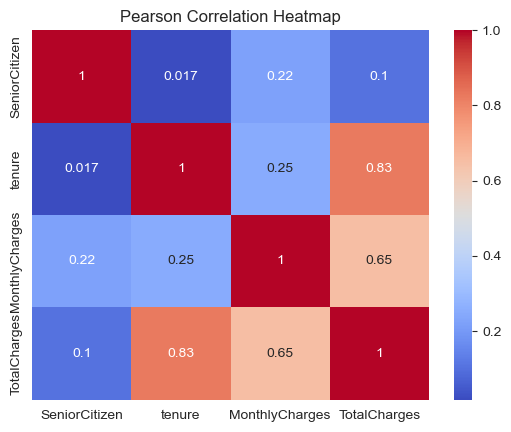

In [16]:
sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

<Axes: >

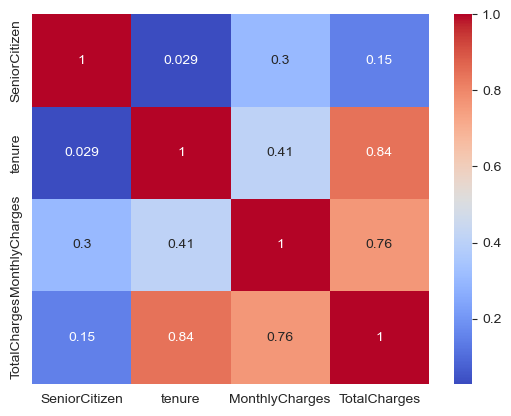

In [17]:
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')

In [18]:
df.select_dtypes

<bound method DataFrame.select_dtypes of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             

In [19]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 20), (2113, 20), (4930,), (2113,))

In [21]:
y_train

1695     No
1095     No
3889     No
3667     No
2902     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 4930, dtype: object

In [22]:
numeric_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object']).columns


In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
num_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])

cat_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_dtc = ColumnTransformer([

    ('num', num_pipe_dtc, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])

dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dtc_pipeline.fit(X_train, y_train)




num_pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])
cat_pipe_rf = Pipeline([
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])
preprocessor_rf = ColumnTransformer([
    ('num', num_pipe_rf, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]



num_pipe_xgb = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    ('pt',  PowerTransformer()),
])
cat_pipe_xgb = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_xgb = ColumnTransformer([
    ('num', num_pipe_xgb, numeric_features),
    ('cat', cat_pipe_xgb, cat_features)
])


xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor_xgb),
    ('classifier', XGBClassifier(random_state=42))
])

xgb_pipeline.fit(X_train, y_train_encoded)
xgb_pred = xgb_pipeline.predict(X_test)
xgb_prob = xgb_pipeline.predict_proba(X_test)



#Logistic Regression
num_pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pt',  PowerTransformer()),
])
cat_pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])
preprocessor_lr = ColumnTransformer([
    ('num', num_pipe_lr, numeric_features),
    ('cat', cat_pipe_lr, cat_features)
])
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('classifier', LogisticRegression(random_state=42))
])
lr_pipeline.fit(X_train, y_train)
lr_pred = lr_pipeline.predict(X_test)
lr_probs = lr_pipeline.predict_proba(X_test)[:, 1]





#set up cat features and remainder passthrough
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Pass through categorical columns without preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),

    ],
    remainder='passthrough'  # This will leave other columns (categorical) untouched
)

# CatBoost pipeline
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0,
                                      cat_features=['remainder__'+ col for col in cat_features]))
])

cat_pipeline.fit(X_train, y_train)
cat_pred = cat_pipeline.predict(X_test)
cat_prob = cat_pipeline.predict_proba(X_test)

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
dtc_pred = dtc_pipeline.predict(X_test)
dtc_prob = dtc_pipeline.predict_proba(X_test)[:, 1]

In [36]:
classification_report_dtc = classification_report(y_test, dtc_pred)
print('Decision tree classifier : \n', classification_report_dtc)

classification_report_rf = classification_report(y_test, rf_pred)
print('Random forest classifier : \n', classification_report_rf)

classification_report_xgb = classification_report(y_test_encoded, xgb_pred)
print('XGBoost classifier : \n', classification_report_xgb)

classification_report_cat = classification_report(y_test, cat_pred)
print('CatBoost classifier : \n', classification_report_cat)

classification_report_lr = classification_report(y_test, lr_pred)
print('Logistic regression classifier : \n', classification_report_lr)


Decision tree classifier : 
               precision    recall  f1-score   support

          No       0.83      0.88      0.85      1539
         Yes       0.61      0.50      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Random forest classifier : 
               precision    recall  f1-score   support

          No       0.81      0.92      0.86      1539
         Yes       0.67      0.44      0.53       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113

XGBoost classifier : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.52      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72    

In [39]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", 0.3, 0.5, 0.7]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True]),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 0.1, step=0.01),
        "class_weight": trial.suggest_categorical("class_weight", [None, 'balanced']),
        "max_samples": trial.suggest_float("max_samples", 0.5, 1.0, step=0.1),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 100),
        "verbose": trial.suggest_int("verbose", 0, 1),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "random_state": 42
    }

    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor_rf),
        ('rf', RandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            max_features=params['max_features'],
            criterion=params['criterion'],
            bootstrap=params['bootstrap'],
            ccp_alpha=params['ccp_alpha'],
            class_weight=params['class_weight'],
            max_samples=params['max_samples'],
            max_leaf_nodes=params['max_leaf_nodes'],
            verbose=params['verbose'],
            warm_start=params['warm_start'],
            random_state=42
        ))
    ])

    # Perform 5-fold cross-validation and return the average score
    score = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy').mean()
    return score

# Run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, timeout=600)  # Try 100 trials or stop after 10 mins

# Output the best trial
print("Best trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestClassifier(**best_params, random_state=42))
])

final_rf_pipeline.fit(X_train, y_train)
f_rf_pred = final_rf_pipeline.predict(X_test)
f_rf_probs = final_rf_pipeline.predict_proba(X_test)

[I 2025-05-10 20:11:47,105] A new study created in memory with name: no-name-29ae8307-687a-45f7-9b27-be1aa6ca2c58
[I 2025-05-10 20:24:45,200] Trial 0 finished with value: 0.6544083489257371 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 0.7, 'criterion': 'entropy', 'bootstrap': True, 'ccp_alpha': 0.09, 'class_weight': 'balanced', 'max_samples': 1.0, 'max_leaf_nodes': 75, 'verbose': 0, 'warm_start': False}. Best is trial 0 with value: 0.6544083489257371.


Best trial:
Value: 0.6544083489257371
Params: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 13, 'max_features': 0.7, 'criterion': 'entropy', 'bootstrap': True, 'ccp_alpha': 0.09, 'class_weight': 'balanced', 'max_samples': 1.0, 'max_leaf_nodes': 75, 'verbose': 0, 'warm_start': False}


In [38]:
f_rf_probs

array([0.26413214, 0.26413214, 0.26413214, ..., 0.26413214, 0.26413214,
       0.26413214])

In [29]:
best_params = study.best_trial.params
final_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('rf', RandomForestClassifier(**best_params, random_state=42))
])

final_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pt',
                                                                   PowerTransformer())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_un...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0.08, max_depth=19,
                                        max_features=0.7, max_leaf_nodes=72,
                                        max_samples=0.7, min_samples_leaf=5,
                                        min_samples_split=12, random_state=42,
                                        warm_start=True))])

In [30]:
report_rfc = classification_report(y_test,f_rf_pred )
print('Random FOREST Report : \n', report_rfc)

Random FOREST Report : 
               precision    recall  f1-score   support

          No       0.73      1.00      0.84      1539
         Yes       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
def objective(trial):
    # Hyperparameters to optimize
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        "max_depth": trial.suggest_int("max_depth", 2, 32),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", [None, "sqrt", "log2"]),
        "splitter": trial.suggest_categorical("splitter", ["best", "random"]),
        "class_weight": trial.suggest_categorical("class_weight", [None, 'balanced']),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 100),
        "min_weight_fraction_leaf": trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 0.1, step=0.01),
        "random_state": 42
    }

    # Create the pipeline with the preprocessor and classifier
    dtc_pipeline = Pipeline([
        ('preprocessor', preprocessor_dtc),
        ('dtc', DecisionTreeClassifier(
            criterion=params['criterion'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            max_features=params['max_features'],
            splitter=params['splitter'],
            class_weight=params['class_weight'],
            max_leaf_nodes=params['max_leaf_nodes'],
            min_weight_fraction_leaf=params['min_weight_fraction_leaf'],
            ccp_alpha=params['ccp_alpha'],
            random_state=params['random_state']
            
        ))
    ])

    score = cross_val_score(dtc_pipeline, X, y, cv=5, n_jobs=-1).mean()
    return score


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

# Print the best trial
print("Best trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('dtc', DecisionTreeClassifier(**best_params))
])

final_dtc_pipeline.fit(X_train, y_train)
f_dtc_pred = final_dtc_pipeline.predict(X_test)
f_dtc_probs = final_dtc_pipeline.predict_proba(X_test)

[I 2025-05-10 19:40:13,672] A new study created in memory with name: no-name-3b208afc-2c89-4644-b54b-dacb74c21ebe
[I 2025-05-10 19:40:21,000] Trial 0 finished with value: 0.7346301575908123 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'splitter': 'best', 'class_weight': None, 'max_leaf_nodes': 11, 'min_weight_fraction_leaf': 0.49860317111237745, 'ccp_alpha': 0.05}. Best is trial 0 with value: 0.7346301575908123.
[I 2025-05-10 19:40:25,860] Trial 1 finished with value: 0.7346301575908123 and parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'splitter': 'best', 'class_weight': None, 'max_leaf_nodes': 46, 'min_weight_fraction_leaf': 0.43125336496880123, 'ccp_alpha': 0.1}. Best is trial 0 with value: 0.7346301575908123.
[I 2025-05-10 19:40:27,651] Trial 2 finished with value: 0.7346301575908123 and parameters: {'criterion': 'gini', 'max_

Best trial:
Value: 0.7346301575908123
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 14, 'max_features': 'sqrt', 'splitter': 'best', 'class_weight': None, 'max_leaf_nodes': 11, 'min_weight_fraction_leaf': 0.49860317111237745, 'ccp_alpha': 0.05}


In [32]:
best_params = study.best_trial.params
final_dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('dtc', DecisionTreeClassifier(**best_params))
])
final_dtc_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('pt',
                                                                   PowerTransformer())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_un...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('dtc',
                 DecisionTreeClassifier(ccp_alpha=0.05, max_depth=5,
                                        max_features='sqrt', max_leaf_nodes=11,
                                        min_samples_leaf=14,
                                        min_samples_split=14,
                                        min_weight_fraction_leaf=0.49860317111237745))])

In [33]:
def objective(trial):
    # Hyperparameters to optimize
    params = {
        "iterations": trial.suggest_int("iterations", 50, 500, step=50),
        "depth": trial.suggest_int("depth", 2, 16),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 1e3, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0),
        "verbose": trial.suggest_int("verbose", 0, 1),
        "random_state": 42
    }

    # Create the pipeline with the preprocessor and classifier
    cat_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('catboost', CatBoostClassifier(
            iterations=params['iterations'],
            depth=params['depth'],
            learning_rate=params['learning_rate'],
            l2_leaf_reg=params['l2_leaf_reg'],
            bagging_temperature=params['bagging_temperature'],
            random_strength=params['random_strength'],
            verbose=params['verbose'],
            random_state=params['random_state']
            
        ))
    ])

    score = cross_val_score(cat_pipeline, X, y, cv=5).mean()
    return score

In [34]:
def objective(trial):
    # Hyperparameters to optimize
    params = {
        "fit_intercept": trial.suggest_categorical("fit_intercept", [True, False]),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "liblinear", "saga"]),
        "n_jobs": trial.suggest_categorical("n_jobs", [-1, 1]) 
    }
    # Create the pipeline with the preprocessor and classifier
    lr_pipeline = Pipeline([
        ('preprocessor', preprocessor_lr),
        ('lr', LogisticRegression(
            fit_intercept=params['fit_intercept'],
            solver=params['solver'],
            n_jobs=params['n_jobs'],
            max_iter=1000
        ))
    ])
    
    score = cross_val_score(lr_pipeline, X, y, cv=5).mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)

# Print the best trial
print("Best trial:")
print("Value:", study.best_trial.value)
print("Params:", study.best_trial.params)

# Train a final model using best parameters if desired
best_params = study.best_trial.params
final_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_lr),
    ('lr', LogisticRegression(**best_params))
])

final_lr_pipeline.fit(X_train, y_train)
f_lr_pred = final_lr_pipeline.predict(X_test)
f_lr_prob = final_lr_pipeline.predict_proba(X_test)


final_report = classification_report(y_test,f_lr_pred )
print('Logistic Regression Report : \n', final_report)

    
         

[I 2025-05-10 19:40:35,658] A new study created in memory with name: no-name-79d04a56-fd81-430a-87ef-74323dc5fec3
[I 2025-05-10 19:48:54,821] Trial 0 finished with value: 0.804061149106394 and parameters: {'fit_intercept': True, 'solver': 'saga', 'n_jobs': 1}. Best is trial 0 with value: 0.804061149106394.
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\smalc\anaconda3\envs\ho

Best trial:
Value: 0.8042031945609395
Params: {'fit_intercept': False, 'solver': 'liblinear', 'n_jobs': 1}
Logistic Regression Report : 
               precision    recall  f1-score   support

          No       0.85      0.91      0.87      1539
         Yes       0.69      0.56      0.61       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [42]:

le = LabelEncoder()
y_test_b = le.fit_transform(y_test)


In [45]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_b, f_rf_probs[:, 1])
auc_rfc = roc_auc_score(y_test_b, f_rf_probs[:, 1])
print(f"Random Forest AUC: {auc_rfc:.2f}")

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_b, f_lr_prob[:, 1])
auc_lr = roc_auc_score(y_test_b, f_lr_prob[:, 1])
print(f"Logistic Regression AUC: {auc_lr:.2f}")


# ROC and AUC for Decision Tree
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test_b, f_dtc_probs[:, 1])
auc_dtc = roc_auc_score(y_test_b, f_dtc_probs[:, 1])
print(f"Decision Tree AUC: {auc_dtc:.2f}")

# ROC and AUC for CatBoost
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test_b, cat_prob[:, 1])
auc_cat = roc_auc_score(y_test_b, cat_prob[:, 1])
print(f"CatBoost AUC: {auc_cat:.2f}")

# ROC and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_b, xgb_prob[:, 1])
auc_xgb = roc_auc_score(y_test_b, xgb_prob[:, 1])
print(f"XGBoost AUC: {auc_xgb:.2f}")



Random Forest AUC: 0.82
Logistic Regression AUC: 0.86
Decision Tree AUC: 0.50
CatBoost AUC: 0.86
XGBoost AUC: 0.83


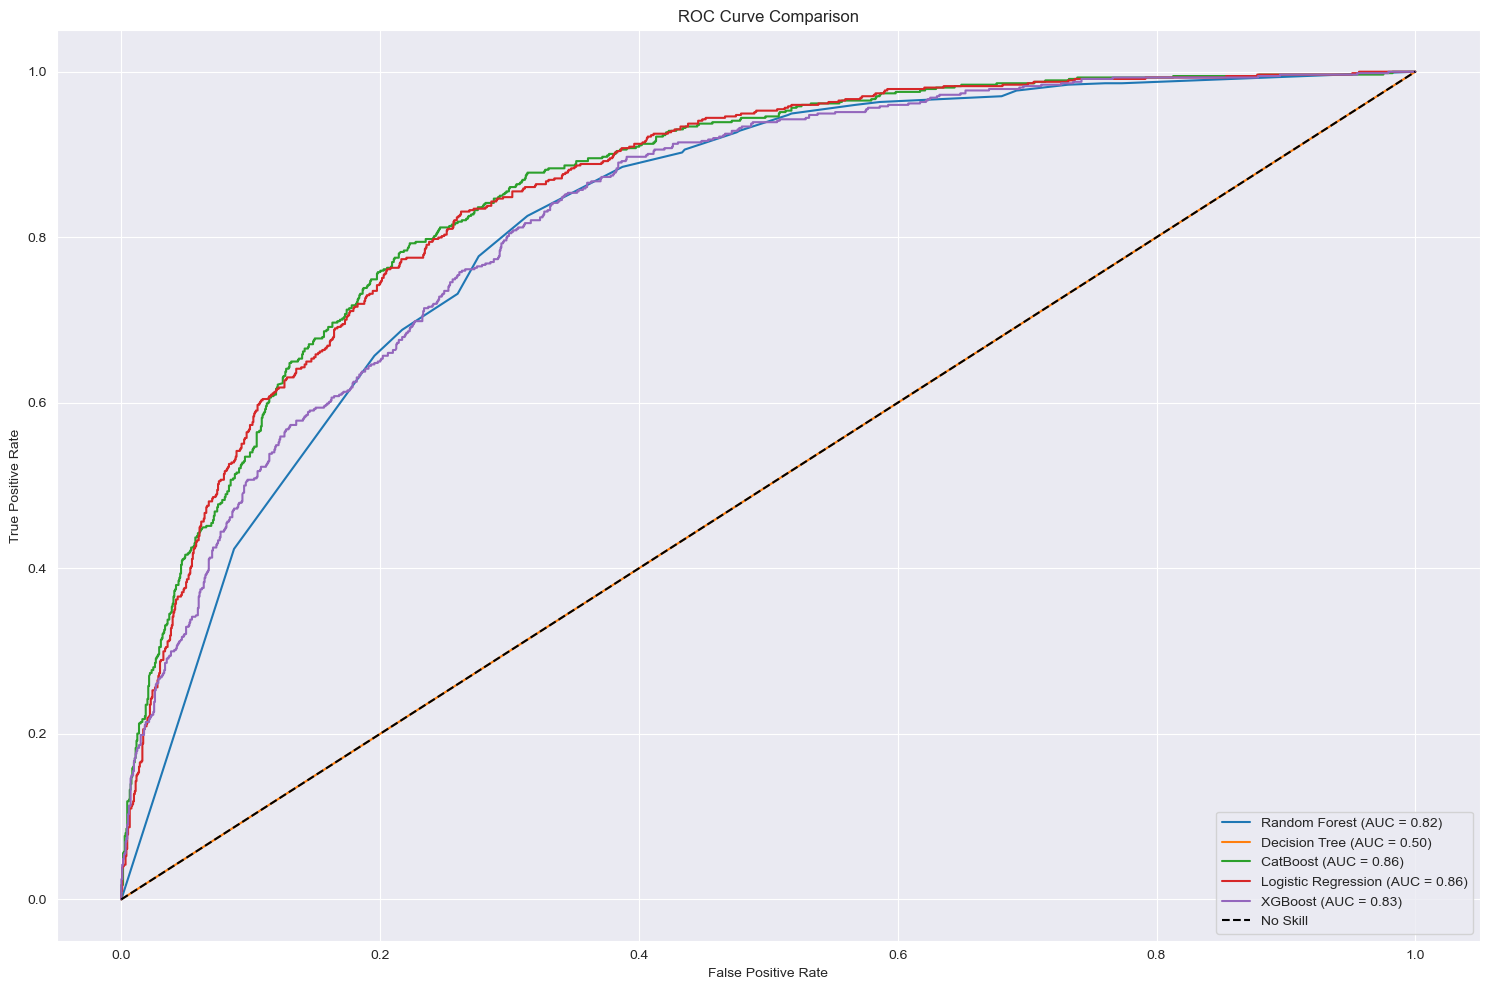

In [49]:

plt.figure(figsize=(15, 10))
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {auc_dtc:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_cat:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')  # Fixed diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

 

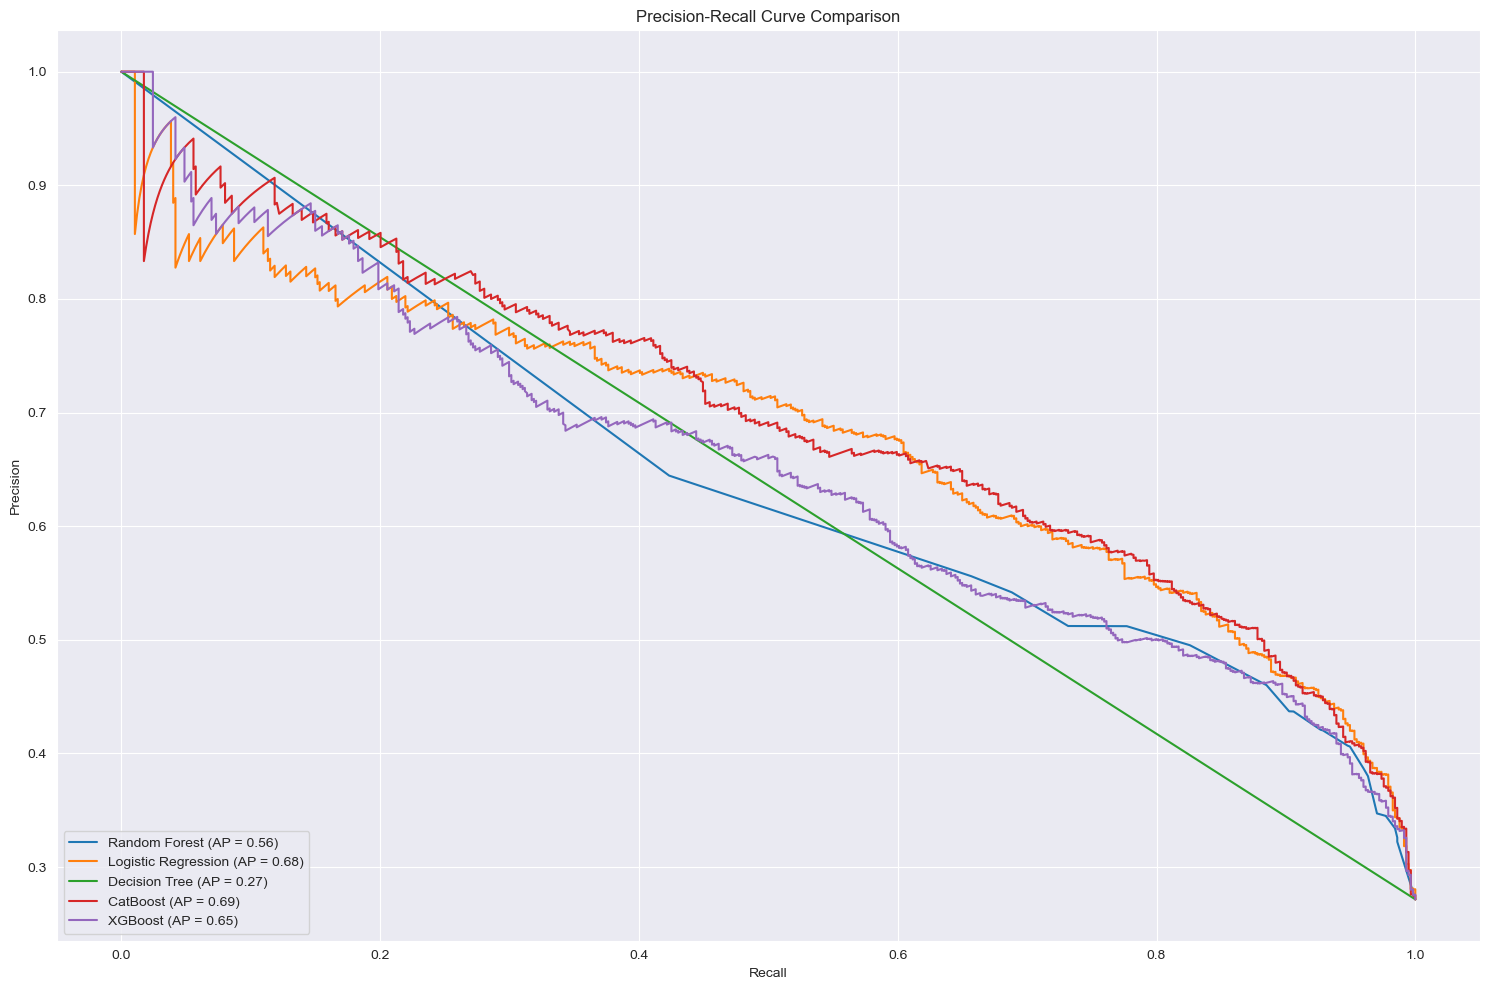

In [48]:
# Precision-Recall for each model
models = {
    'Random Forest': f_rf_probs,
    'Logistic Regression': f_lr_prob,
    'Decision Tree': f_dtc_probs,
    'CatBoost': cat_prob,
    'XGBoost': xgb_prob
}

plt.figure(figsize=(15, 10))

for name, probs in models.items():
    # If probs is 2D (from predict_proba), get class 1 probs
    if probs.ndim == 2:
        probs = probs[:, 1]

    precision, recall, _ = precision_recall_curve(y_test_b, probs)
    avg_precision = average_precision_score(y_test_b, probs)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_precision:.2f})")

# Plot formatting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

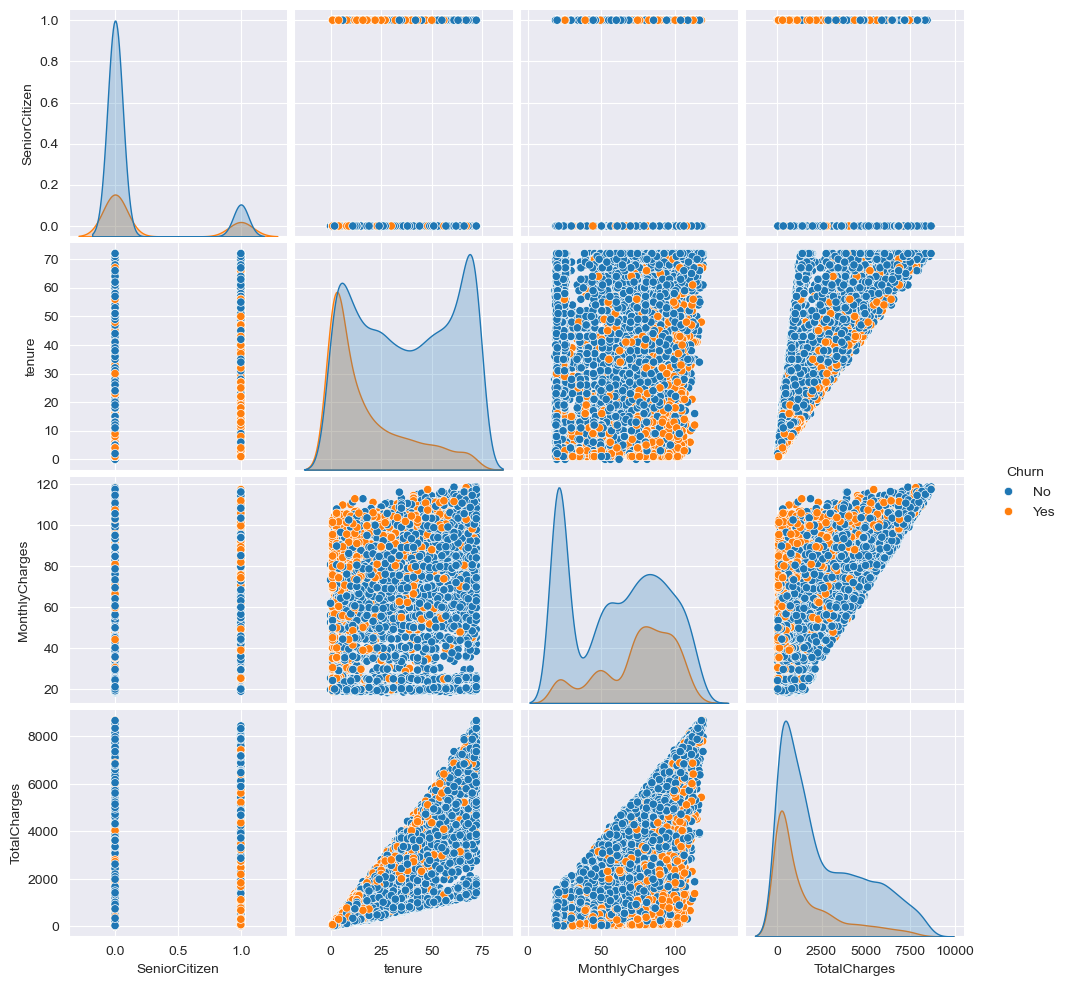

In [56]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='Churn')


C:\Users\smalc\anaconda3\envs\homework\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

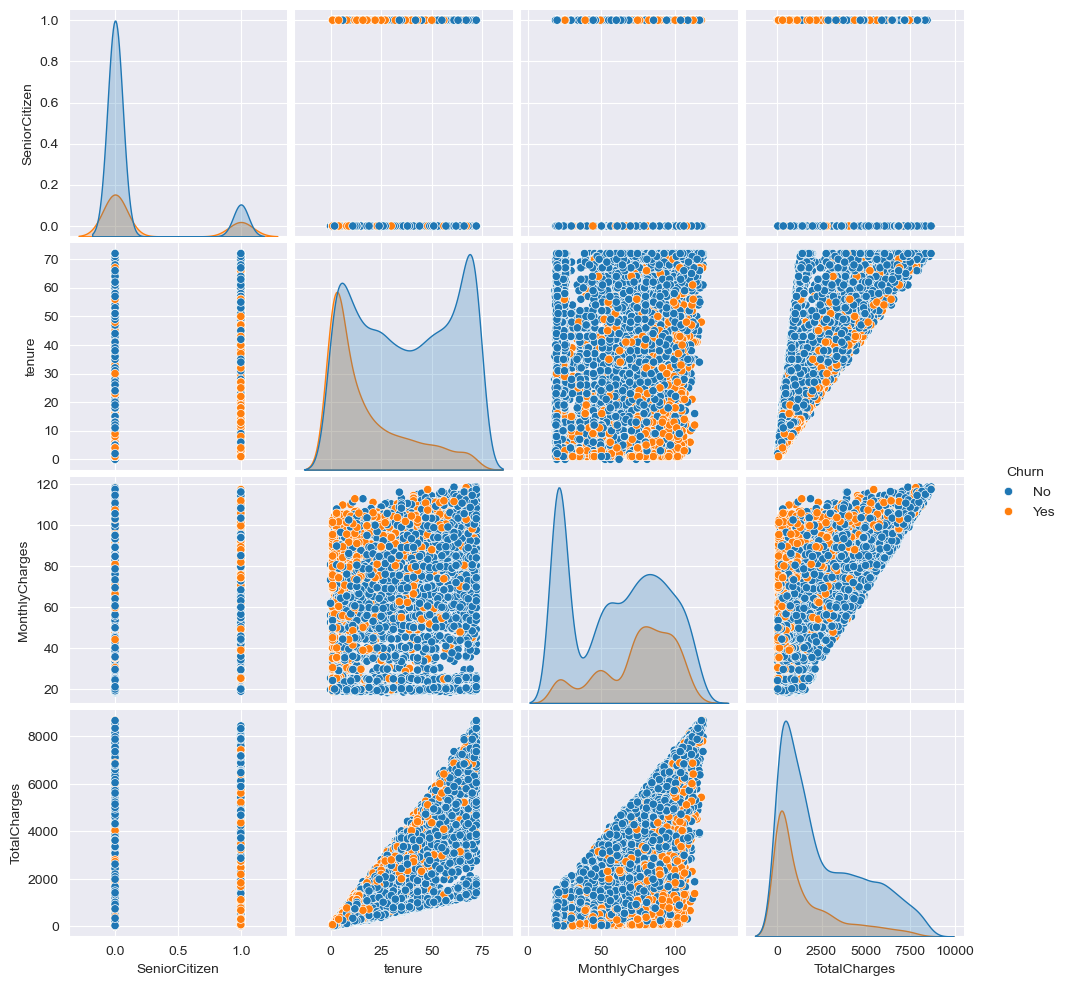

In [57]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, hue='Churn', diag_kind='kde')

In [58]:
joblib.dump(final_lr_pipeline, 'lr_model.pkl')

['lr_model.pkl']

In [61]:
joblib.dump(cat_pipeline, 'cat_model.pkl')

['cat_model.pkl']